Data loaded successfully!
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   user_id           148935 non-null  float64
 1   application       149429 non-null  object 
 2   session_duration  150000 non-null  float64
 3   download_data     150000 non-null  float64
 4   upload_data       150000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 5.7+ MB
None
        user_id application  session_duration  download_data  upload_data
0  3.366496e+10     Samsung         1823652.0    308879636.0   36749741.0
1  3.368185e+10     Samsung         1365104.0    653384965.0   53800391.0
2  3.376063e+10     Samsung         1361762.0    279807335.0   27883638.0
3  3.375034e+10   undefined         1321509.0    846028530.0   43324218.0
4  3.369980e+10     Samsung         1089009.0    569138589.0   38542814.0
Cleaned Data:
<class 'panda

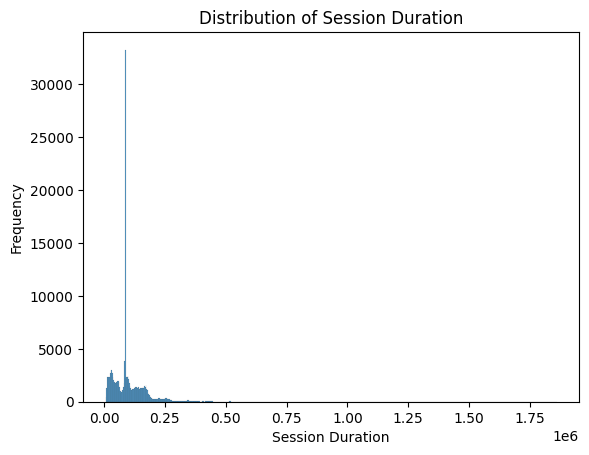

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sys
import os

# Add the src directory to the system path for importing modules
sys.path.append(os.path.abspath('C:/Users/Hp/User_Overview_Analysis/scripts'))
from aggregate_data import aggregate_user_data
from extract_data import connect_to_db
from clean_data import clean_data  # Import the clean_data function

# Fetch data from PostgreSQL using the function from extract_data.py
df = connect_to_db()

# Verify loaded data
print("Data loaded successfully!")
print(df.info())
print(df.head())

# Clean the data using the function from clean_data.py
df = clean_data(df)

# Verify cleaned data
print("Cleaned Data:")
print(df.info())
print(df.head())

# Aggregate data
aggregated_data, total_data_per_decile = aggregate_user_data(df)

# Check the type of aggregated_data and total_data_per_decile
print(f"Type of aggregated_data: {type(aggregated_data)}")
print(f"Type of total_data_per_decile: {type(total_data_per_decile)}")

# Print the first few rows of aggregated_data to verify the result
print("Aggregated Data:")
print(aggregated_data.head())

# Print the total data per decile to verify the result
print("Total Data per Decile:")
print(total_data_per_decile.head())

# Univariate Analysis - Histogram for session_duration
sns.histplot(df['session_duration'])
plt.title('Distribution of Session Duration')
plt.xlabel('Session Duration')
plt.ylabel('Frequency')
plt.show()
